# Prepare workstation

In [1]:
# import all the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data set.
surveys = pd.read_csv(r'C:\Users\pedrac\Documents\LSE Data Analytics\Employer Project\LSE_DA_Employer_Project_TW_London\Sydney\Bicycle_count_surveys.csv')
sites = pd.read_csv(r'C:\Users\pedrac\Documents\LSE Data Analytics\Employer Project\LSE_DA_Employer_Project_TW_London\Sydney\Bicycle_count_sites.csv')

# Sense Check the data

In [2]:
# view the df
surveys.head()

,SiteID,Month,Year,TotalCount,ObjectId2,Time_0600,Time_0700,Time_0800,Time_1600,Time_1700,Time_1800
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [3]:
# view the df
sites.head()

,X,Y,OBJECTID,SiteID,Intersection
0,151.204168,-33.882846,1,1,"Intersection of Broadway, Lee Street, Quay Str..."
1,151.208601,-33.878286,2,2,Intersection of Castlereagh Street and Goulbur...
2,151.205783,-33.863364,3,3,Intersection of Grosvenor Street and Glouceste...
3,151.209897,-33.873292,4,4,Intersection of Elizabeth Street and Park Street
4,151.209083,-33.879797,5,5,"Intersection of Elizabeth Street, Wentworth Av..."


In [4]:
# change column headings to names that are easier to reference
sites.rename(columns = {'X':'Longitude', 'Y':'Latitude'}, inplace = True)
sites.columns

Index(['Longitude', 'Latitude', 'OBJECTID', 'SiteID', 'Intersection'], dtype='object')

In [5]:
# print the shape, data types and metadata
print(surveys.shape)
print(surveys.dtypes)
print(surveys.info())

(2215, 11)
SiteID         int64
Month         object
Year           int64
TotalCount     int64
ObjectId2      int64
Time_0600      int64
Time_0700      int64
Time_0800      int64
Time_1600      int64
Time_1700      int64
Time_1800      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SiteID      2215 non-null   int64 
 1   Month       2215 non-null   object
 2   Year        2215 non-null   int64 
 3   TotalCount  2215 non-null   int64 
 4   ObjectId2   2215 non-null   int64 
 5   Time_0600   2215 non-null   int64 
 6   Time_0700   2215 non-null   int64 
 7   Time_0800   2215 non-null   int64 
 8   Time_1600   2215 non-null   int64 
 9   Time_1700   2215 non-null   int64 
 10  Time_1800   2215 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 190.5+ KB
None


In [6]:
# print the shape, data types and metadata
print(sites.shape)
print(sites.dtypes)
print(sites.info())

(109, 5)
Longitude       float64
Latitude        float64
OBJECTID          int64
SiteID            int64
Intersection     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     109 non-null    float64
 1   Latitude      109 non-null    float64
 2   OBJECTID      109 non-null    int64  
 3   SiteID        109 non-null    int64  
 4   Intersection  109 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ KB
None


In [7]:
# determine whether there are null values in the df
surveys.isnull().sum()

SiteID        0
Month         0
Year          0
TotalCount    0
ObjectId2     0
Time_0600     0
Time_0700     0
Time_0800     0
Time_1600     0
Time_1700     0
Time_1800     0
dtype: int64

In [8]:
# determine whether there are null values in the df
sites.isnull().sum()

Longitude       0
Latitude        0
OBJECTID        0
SiteID          0
Intersection    0
dtype: int64

In [9]:
# Remove blank spaces
surveys = surveys.applymap(lambda x: " ".join(x.split()) if isinstance(x, str) else x)

In [10]:
# dropping ALL duplicate values
surveys.drop_duplicates(subset=["SiteID", "Month", "Year"],
                     keep=False, inplace=True)

In [11]:
surveys.head()

,SiteID,Month,Year,TotalCount,ObjectId2,Time_0600,Time_0700,Time_0800,Time_1600,Time_1700,Time_1800
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [12]:
surveys.shape

(2215, 11)

No duplicates were found in the dataset

## Descriptive Statistics

In [13]:
# create a summary of the descriptive statistics
surveys.describe()

,SiteID,Year,TotalCount,ObjectId2,Time_0600,Time_0700,Time_0800,Time_1600,Time_1700,Time_1800
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,52.748081,2015.307449,499.086230,1126.790519,42.607223,88.642438,114.964334,56.424379,103.087133,92.879910
std,30.012911,3.565469,485.023818,664.561662,60.945213,101.371594,117.587336,48.984111,99.571231,89.525962
min,1.000000,2010.000000,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,27.000000,2012.000000,193.000000,554.500000,14.000000,30.000000,40.000000,24.000000,40.000000,34.000000
50%,53.000000,2015.000000,326.000000,1108.000000,25.000000,51.000000,73.000000,40.000000,68.000000,62.000000
75%,79.000000,2018.000000,594.000000,1698.500000,47.000000,101.500000,146.000000,73.000000,129.000000,119.000000
max,110.000000,2022.000000,2898.000000,2294.000000,948.000000,785.000000,787.000000,523.000000,591.000000,614.000000


## Outliers

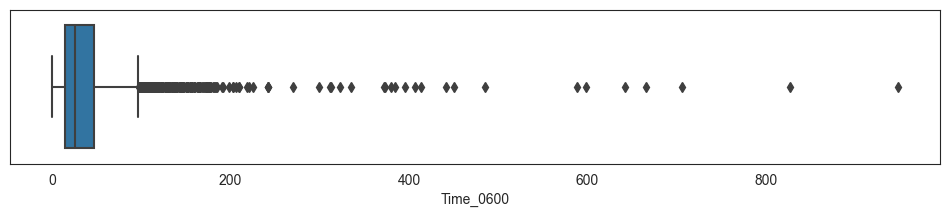

In [14]:
# white grid
sns.set_style('white') 

# Determine outliers for 6am
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=surveys['Time_0600'], whis=1.5)

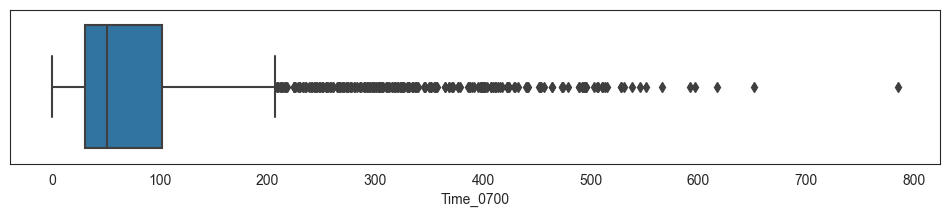

In [15]:
# white grid
sns.set_style('white') 

# Determine outliers for 7am
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=surveys['Time_0700'], whis=1.5)

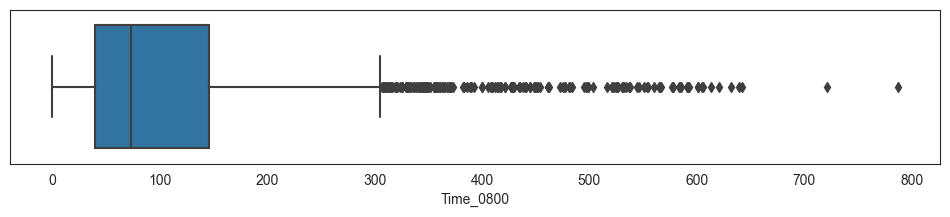

In [16]:
# white grid
sns.set_style('white') 

# Determine outliers for 8am
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=surveys['Time_0800'], whis=1.5)

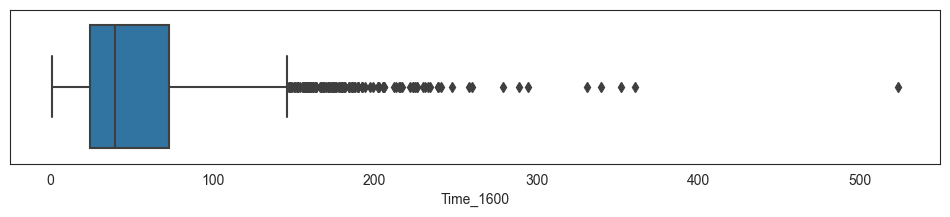

In [17]:
# white grid
sns.set_style('white') 

# Determine outliers for 16pm
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=surveys['Time_1600'], whis=1.5)

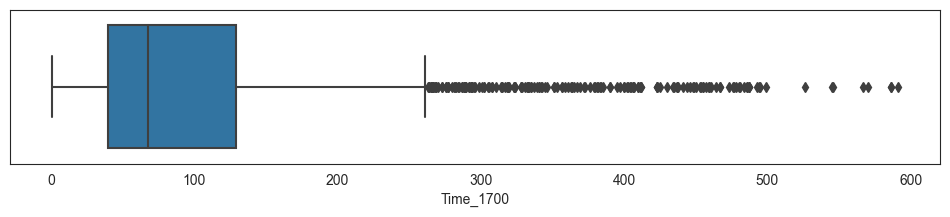

In [18]:
# white grid
sns.set_style('white') 

# Determine outliers for 17pm
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=surveys['Time_1700'], whis=1.5)

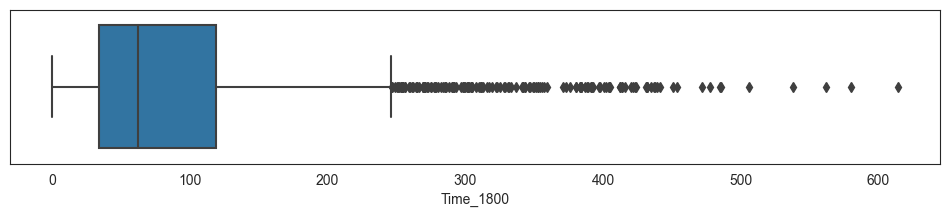

In [19]:
# white grid
sns.set_style('white') 

# Determine outliers for 18pm
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=surveys['Time_1800'], whis=1.5)

Outliers were found but not removed are likely to give an indication of the most popular cycling areas

## Data Wrangling

In [20]:
# remove irrelevant columns
surveys.drop(['TotalCount', 'ObjectId2'], axis=1, inplace=True)
sites.drop(['OBJECTID'], axis=1, inplace=True)

print(sites.columns)
print(surveys.columns)

Index(['Longitude', 'Latitude', 'SiteID', 'Intersection'], dtype='object')
Index(['SiteID', 'Month', 'Year', 'Time_0600', 'Time_0700', 'Time_0800',
       'Time_1600', 'Time_1700', 'Time_1800'],
      dtype='object')


In [21]:
# add Total column to df (as the original one wouldn't return the exact sum of the time columns)
surveys['Total'] = surveys['Time_0600'] + surveys['Time_0700']+surveys['Time_0800']+surveys['Time_1600']+surveys['Time_1700']
+surveys['Time_1800']

0        67
1        62
2        21
3        52
4        98
       ... 
2210    183
2211    166
2212    128
2213    206
2214     21
Name: Time_1800, Length: 2215, dtype: int64

In [22]:
# merge df on SiteID column
merged = pd.merge(surveys, sites, on ='SiteID', how ="outer")

merged.shape

(2215, 13)

In [23]:
merged.head()

,SiteID,Month,Year,Time_0600,Time_0700,Time_0800,Time_1600,Time_1700,Time_1800,Total,Longitude,Latitude,Intersection
0,51,March,2010,12,45,56,27,56,67,196,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...
1,51,October,2010,24,52,70,30,54,63,230,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...
2,51,October,2015,23,87,76,32,52,70,270,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...
3,51,March,2016,18,70,85,27,79,73,279,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...
4,51,March,2017,26,78,96,29,70,65,299,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...


In [24]:
# determine whether there are null values in the df
merged.isnull().sum()

SiteID          0
Month           0
Year            0
Time_0600       0
Time_0700       0
Time_0800       0
Time_1600       0
Time_1700       0
Time_1800       0
Total           0
Longitude       1
Latitude        1
Intersection    1
dtype: int64

In [25]:
merged = merged.dropna(how='any',axis=0)
merged.shape

(2214, 13)

One row containing null values was found and removed from the dataframe

In [26]:
# dropping ALL duplicate values
merged.drop_duplicates(subset=["SiteID", "Month", "Year"],
                     keep=False, inplace=True)

merged.shape

(2214, 13)

There were no duplicate rows

In [27]:
merged.columns

Index(['SiteID', 'Month', 'Year', 'Time_0600', 'Time_0700', 'Time_0800',
       'Time_1600', 'Time_1700', 'Time_1800', 'Total', 'Longitude', 'Latitude',
       'Intersection'],
      dtype='object')

In [28]:
# unpivot surveys df
unpivoted = pd.melt(merged, id_vars=['SiteID', 'Year', 'Total', 'Month', 'Longitude', 'Latitude', 'Intersection'], 
                    var_name='Time', value_name='Count')
unpivoted.head()

,SiteID,Year,Total,Month,Longitude,Latitude,Intersection,Time,Count
0,51,2010,196,March,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...,Time_0600,12
1,51,2010,230,October,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...,Time_0600,24
2,51,2015,270,October,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...,Time_0600,23
3,51,2016,279,March,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...,Time_0600,18
4,51,2017,299,March,151.178546,-33.88441,Intersection of Pyrmont Bridge Road and Lyons ...,Time_0600,26


## Reverse Geocoding

# Exploratory Analysis

In [29]:
# set colour palette
palette = sns.color_palette("ch:s=.25,rot=-.25")

# white grid
sns.set_style('white') 

# font size of the axes titles
plt.rc('axes', titlesize=18) 

#fFont size of the x and y labels
plt.rc('axes', labelsize=14)    

# font size of the tick labels
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# font size of the tick labels
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# font size of the Legend
plt.rc('legend', fontsize=13)

# default text size
plt.rc('font', size=13)    

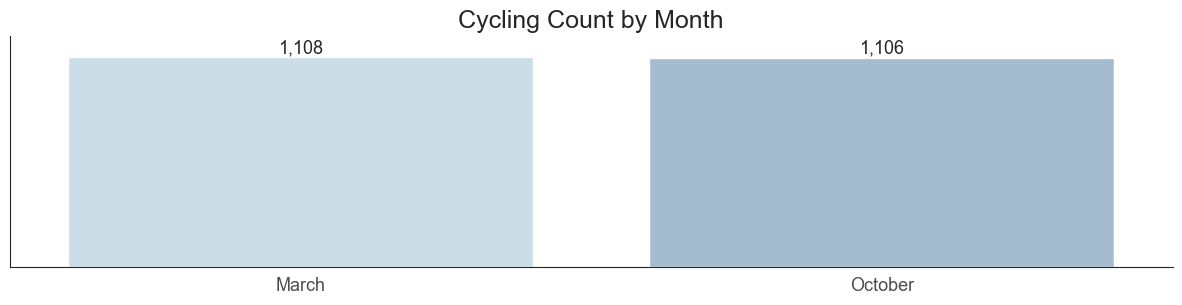

In [30]:
#visualise number of records by month
fig, axs = plt.subplots(figsize=(15, 3))
sns.barplot(x=merged.Month.value_counts().index, y=merged.Month.value_counts(), palette=palette)

# set labels and title
axs.set_xlabel("")
axs.set_ylabel("")
axs.set_title("Cycling Count by Month")

#remove border from chart
sns.despine()

# remove axis as bar labels will be added to the chart
axs.set(yticklabels=[])
axs.tick_params(left=False)
axs.margins(y=0.1) # make room for bar labels

# add bar labels with no decimal points and thousands separator 
for bars in axs.containers:
    axs.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])

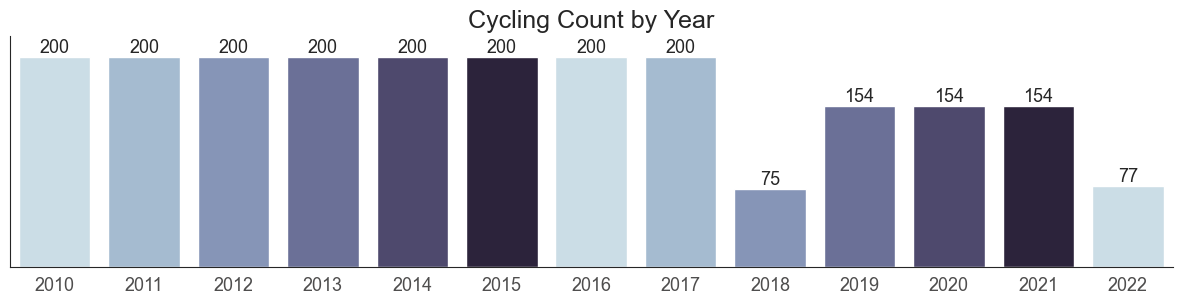

In [31]:
#visualise number of records by year
fig, axs = plt.subplots(figsize=(15, 3))
sns.barplot(x=merged.Year.value_counts().index, y=merged.Year.value_counts(), palette=palette)

# set labels and title
axs.set_xlabel("")
axs.set_ylabel("")
axs.set_title("Cycling Count by Year")

#remove border from chart
sns.despine()

# remove axis as bar labels will be added to the chart
axs.set(yticklabels=[])
axs.tick_params(left=False)
axs.margins(y=0.1) # make room for bar labels

# add bar labels with no decimal points and thousands separator 
for bars in axs.containers:
    axs.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])

In [32]:
# subset df - only keep Count and Year columns
year_count = unpivoted[['Year', 'Count']]

# Group by SiteID
year_count = year_count.groupby('Year').sum('Count').reset_index()

# sort values based on Count
year_count = year_count.sort_values(by='Count', ascending=False)

C:\Users\pedrac\AppData\Local\Temp\ipykernel_3304\696659891.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='Count', data=year_count, errorbar=None,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


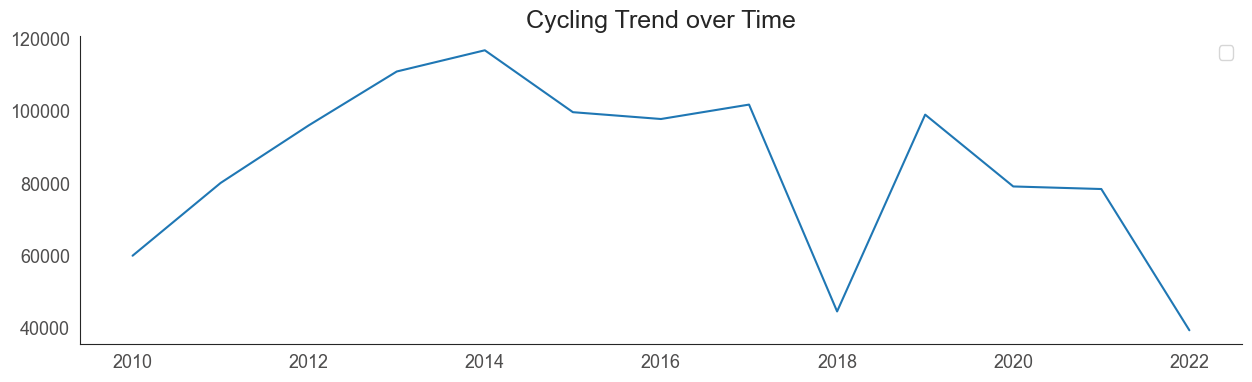

In [33]:
# visualise ss trend without GP to bettwern understand the trend for other categories
fig, axs = plt.subplots(figsize=(15, 4))
sns.lineplot(x='Year', y='Count', data=year_count, errorbar=None, 
             palette=palette)

# set labels, title, and legend position
axs.set_xlabel("")
axs.set_ylabel("")
axs.set_title("Cycling Trend over Time")
plt.legend(loc='best')

#remove border from chart
sns.despine()

In [34]:
# subset df - only keep Count, Month and Year columns
yeartime_count = unpivoted[['Year', 'Month', 'Count']]

# Group by SiteID
yeartime_count = yeartime_count.groupby(['Year', 'Month']).sum('Count').reset_index()

# sort values based on Count
yeartime_count = yeartime_count.sort_values(by='Count', ascending=False)

C:\Users\pedrac\AppData\Local\Temp\ipykernel_3304\2895329210.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(x='Year', y='Count', hue='Month', data=yeartime_count, errorbar=None,


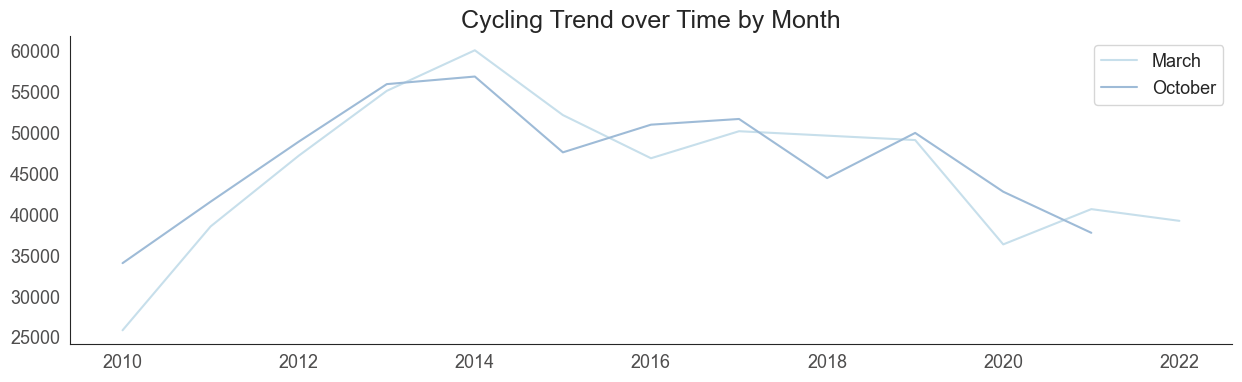

In [35]:
# visualise ss trend without GP to bettwern understand the trend for other categories
fig, axs = plt.subplots(figsize=(15, 4))
sns.lineplot(x='Year', y='Count', hue='Month', data=yeartime_count, errorbar=None, 
             palette=palette)

# set labels, title, and legend position
axs.set_xlabel("")
axs.set_ylabel("")
axs.set_title("Cycling Trend over Time by Month")
plt.legend(loc='best')

#remove border from chart
sns.despine()

In [36]:
# subset df - only keep Count and Time columns
time_count = unpivoted[['Time', 'Count']]

# Group by SiteID
time_count = time_count.groupby('Time').sum('Count').reset_index()

# sort values based on Count
time_count = time_count.sort_values(by='Count', ascending=False)

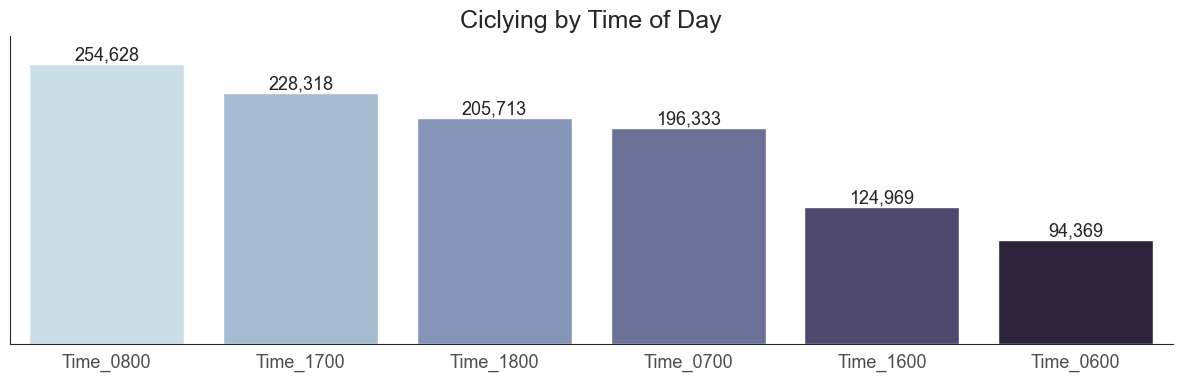

In [37]:
# visualise total count by time
fig, axs = plt.subplots(figsize=(15, 4))
sns.barplot(x='Time', y='Count', data=time_count, palette=palette)

# set labels and title
axs.set_xlabel("")
axs.set_ylabel("")
axs.set_title("Ciclying by Time of Day")

#remove border from chart
sns.despine()

# remove axis as bar labels will be added to the chart
axs.set(yticklabels=[])
axs.tick_params(left=False)
axs.margins(y=0.1) # make room for bar labels

# add bar labels with no decimal points and thousands separator 
for bars in axs.containers:
    axs.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])

In [38]:
# change data type from int to string for SiteID 
unpivoted.SiteID = unpivoted.SiteID.astype(str)

# subset df - only keep Count and SiteID columns
site_count = unpivoted[['SiteID', 'Count']]

# Group by SiteID
site_count = site_count.groupby('SiteID').sum('Count').reset_index()

# sort values based on Count
site_count = site_count.sort_values(by='Count', ascending=False)

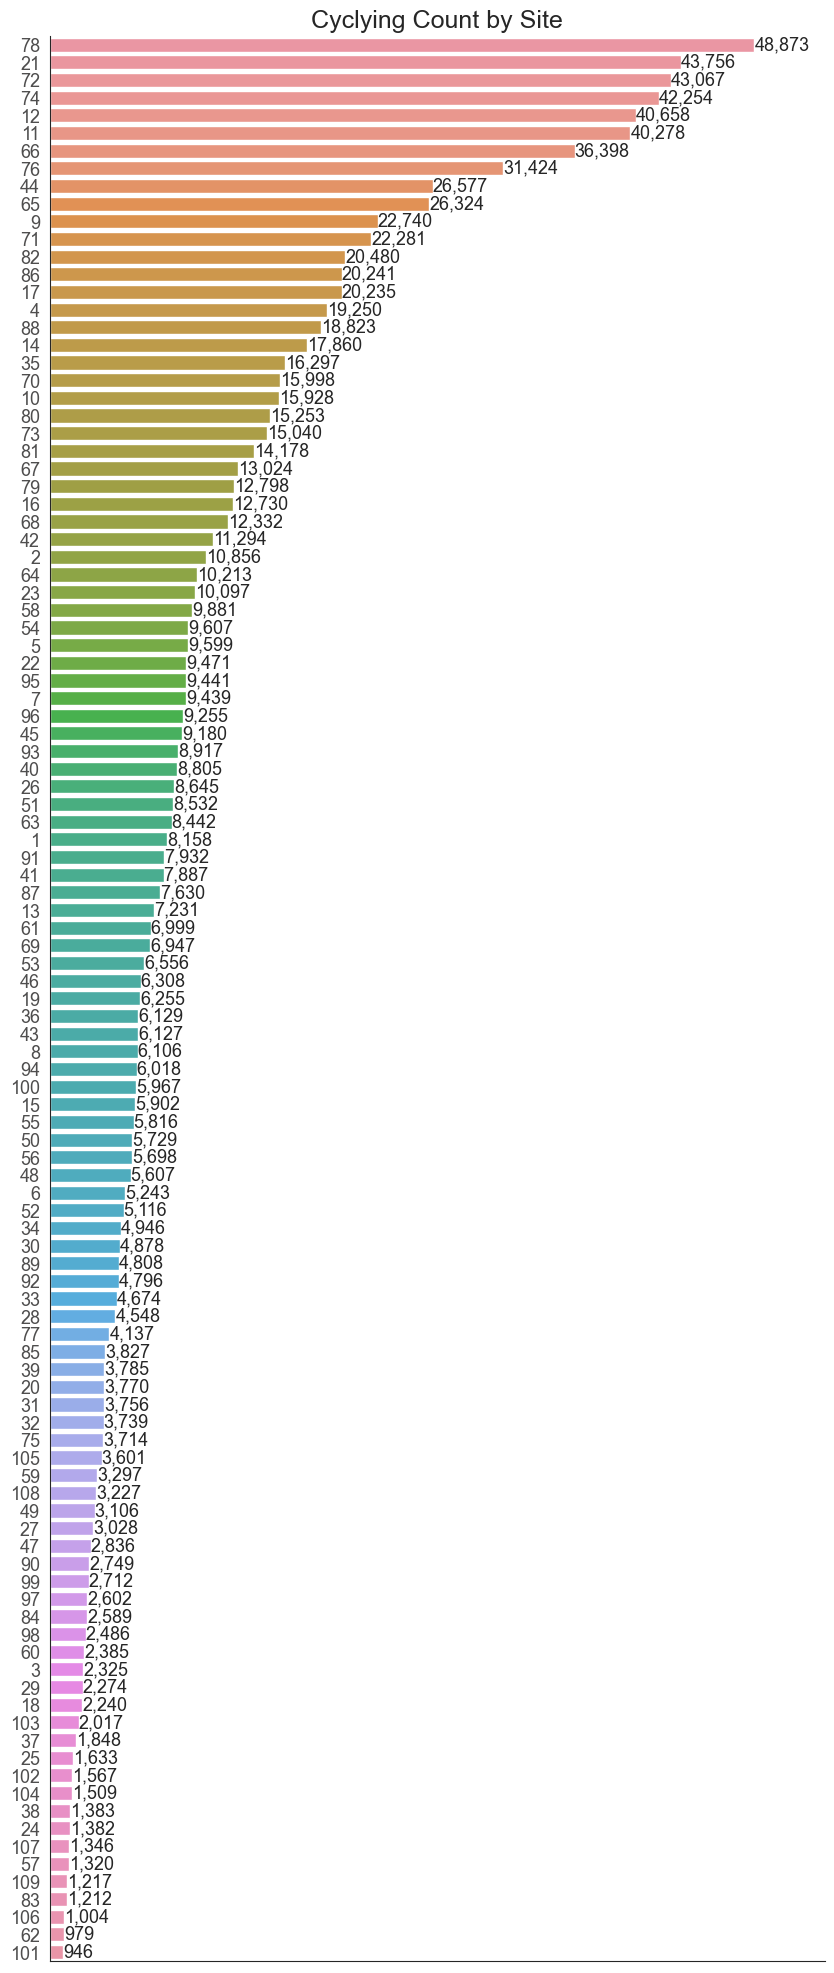

In [39]:
# visualise top locations by national category
fig, axs = plt.subplots(figsize=(10, 25))
sns.barplot(x='Count', y='SiteID', data=site_count)

# set labels and title
axs.set_xlabel("")
axs.set_ylabel("")
axs.set_title("Cyclying Count by Site")

#remove border from chart
sns.despine()

# remove axis as bar labels will be added to the chart
axs.set(xticklabels=[])
axs.tick_params(bottom=False)
axs.margins(x=0.1) # make room for bar labels

# add bar labels with no decimal points and thousands separator 
for bars in axs.containers:
    axs.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])